In [6]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

# Зчитуємо таблиці з веб-сторінки
url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C"
dfs = pd.read_html(url)

# Виводимо всі таблиці, що були знайдені на сторінці
for i, df in enumerate(dfs):
    print(f"Таблиця {i}:")
    print(df)
    print(df.head())

Таблиця 0:
                                    Населення України  \
0   Статево-вікова піраміда населення України на 1...   
1                                         Чисельність   
2                                             Густота   
3                                 Коефіцієнт міграції   
4                                       Природний рух   
5                                   Природний приріст   
6                                      Народжуваність   
7                                        Фертильність   
8                                          Смертність   
9                                 Смертність немовлят   
10                                   Вікова структура   
11                                      • до 14 років   
12                                      • 15–64 років   
13                              • старіші за 65 років   
14                           Середня тривалість життя   
15                                        • чоловіків   
16                  

In [5]:
# Вибираємо потрібну таблицю
birth_rate_table = dfs[12]  # Індекс 12 вказує на потрібну таблицю

print(birth_rate_table)

               Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0                Крим  230.0  206.0  160.0   130    73   126    —    —
1           Вінницька  224.0  192.0  142.0   124    84   112  109   76
2           Волинська  247.0  250.0  179.0   153   112   148  141  101
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4            Донецька  271.0  214.0  140.0   109    61    98   82    —
5         Житомирська  261.0  223.0  159.0   129    89   122  120   79
6        Закарпатська  314.0  273.0  207.0   168   115   151  146  104
7          Запорізька  219.0  197.0  150.0   124    71   106  106   68
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122   88
9            Київська  204.0  189.0  156.0   123    73   122  121   80
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108   68
11          Луганська  262.0  235.0  144.0   116    62    96   51    —
12          Львівська  234.0  240.0  171.0   140    91   119  119   87
13    

In [7]:
# Визначаємо кількість рядків та стовпців у датафреймі
rows, columns = birth_rate_table.shape

print("Кількість рядків у датафреймі:", rows)
print("Кількість стовпців у датафреймі:", columns)

Кількість рядків у датафреймі: 28
Кількість стовпців у датафреймі: 9


In [50]:
# Замінюємо значення "—" на NaN у всьому датафреймі
birth_rate_table.replace("—", float("NaN"), inplace=True)

# Виводимо перші 5 рядків таблиці для перевірки
print(birth_rate_table.head())

             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126  NaN  NaN
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82  NaN


In [8]:
# Замінюємо значення "—" на NaN у всьому датафреймі
birth_rate_table.replace("—", float("NaN"), inplace=True)

# Визначаємо типи всіх стовпців
column_types = birth_rate_table.dtypes

print("Типи стовпців:")
print(column_types)

Типи стовпців:
Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object


In [9]:
# Замінюємо типи нечислових колонок на числові
for column in birth_rate_table.columns:
    if pd.api.types.is_numeric_dtype(birth_rate_table[column]):
        continue
    else:
        birth_rate_table[column] = pd.to_numeric(birth_rate_table[column], errors='coerce')

# Виводимо типи всіх стовпців для перевірки
print("Типи стовпців після заміни:")
print(birth_rate_table.dtypes)

Типи стовпців після заміни:
Регіон    float64
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014      float64
2019      float64
dtype: object


In [10]:
# Пораховуємо частку пропусків у кожній колонці
missing_values_fraction = birth_rate_table.isnull().mean()

print("Частка пропусків у кожній колонці:")
print(missing_values_fraction)

Частка пропусків у кожній колонці:
Регіон    1.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64


In [11]:
# Видаляємо останній рядок
birth_rate_table.drop(birth_rate_table.index[-1], inplace=True)

# Виводимо перші 5 рядків таблиці для перевірки
print(birth_rate_table.head())

   Регіон   1950   1960   1970  1990  2000  2012   2014   2019
0     NaN  230.0  206.0  160.0   130    73   126    NaN    NaN
1     NaN  224.0  192.0  142.0   124    84   112  109.0   76.0
2     NaN  247.0  250.0  179.0   153   112   148  141.0  101.0
3     NaN  204.0  204.0  151.0   123    71   112  111.0   71.0
4     NaN  271.0  214.0  140.0   109    61    98   82.0    NaN


In [12]:
# Замінюємо відсутні дані в кожному стовпці на середнє значення цих стовпців
birth_rate_table.fillna(birth_rate_table.mean(), inplace=True)

# Виводимо перші 5 рядків таблиці для перевірки
print(birth_rate_table.head())

   Регіон   1950   1960   1970  1990  2000  2012    2014        2019
0     NaN  230.0  206.0  160.0   130    73   126  111.44   80.173913
1     NaN  224.0  192.0  142.0   124    84   112  109.00   76.000000
2     NaN  247.0  250.0  179.0   153   112   148  141.00  101.000000
3     NaN  204.0  204.0  151.0   123    71   112  111.00   71.000000
4     NaN  271.0  214.0  140.0   109    61    98   82.00   80.173913


In [13]:
# Вибираємо дані за 2019 рік
birth_rate_2019 = birth_rate_table["2019"]

# Знаходимо середнє значення народжуваності за 2019 рік по всій Україні
average_birth_rate_2019 = birth_rate_2019.mean()

# Знаходимо регіони, де рівень народжуваності у 2019 році був вищим за середній по Україні
regions_higher_than_average = birth_rate_2019[birth_rate_2019 > average_birth_rate_2019]

# Отримуємо список регіонів
regions_list = regions_higher_than_average.index.tolist()

print("Регіони, де рівень народжуваності у 2019 році був вищим за середній по Україні:")
print(regions_list)

Регіони, де рівень народжуваності у 2019 році був вищим за середній по Україні:
[2, 6, 8, 12, 14, 16, 20, 23, 25]


In [14]:
# Вибираємо дані за 2014 рік
birth_rate_2014 = birth_rate_table["2014"]

# Знаходимо регіон з найвищою народжуваністю у 2014 році
region_with_highest_birth_rate_2014 = birth_rate_2014.idxmax()

print("Регіон з найвищою народжуваністю у 2014 році:", region_with_highest_birth_rate_2014)

Регіон з найвищою народжуваністю у 2014 році: 16


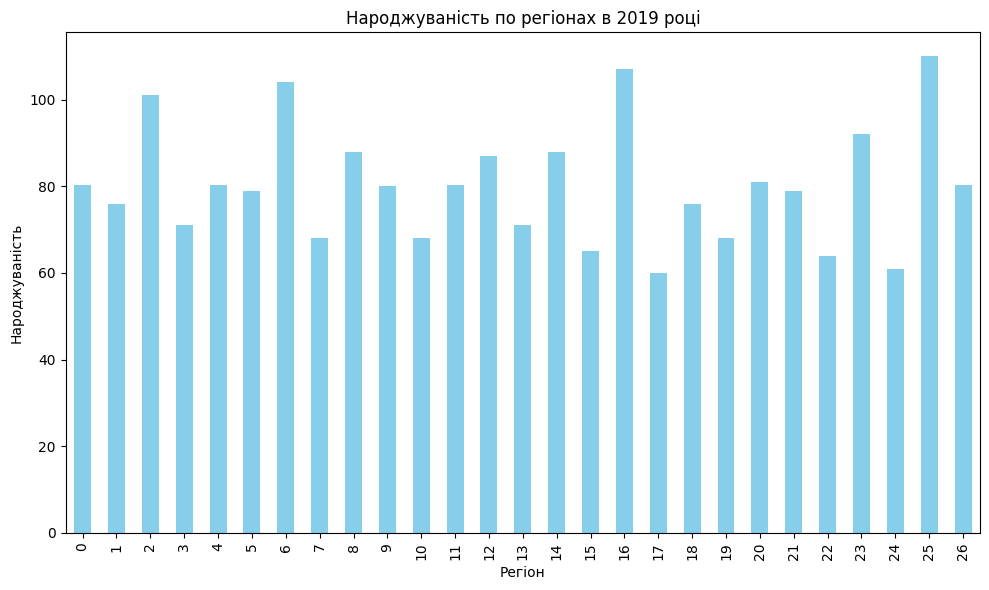

In [15]:
# Вибираємо дані за 2019 рік
birth_rate_2019 = birth_rate_table["2019"]

# Побудова стовпчикової діаграми
plt.figure(figsize=(10,6))
birth_rate_2019.plot(kind='bar', color='skyblue')
plt.title('Народжуваність по регіонах в 2019 році')
plt.xlabel('Регіон')
plt.ylabel('Народжуваність')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()